In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import silhouette_score
from tqdm import tqdm

В ДЗ использован датасет https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [68]:
df = pd.read_csv('creditcard.csv', sep=',')

In [69]:
df_anomal = df.loc[df['Class'] == 1]
df_reduced = df.sample(frac=0.1)

In [70]:
df_new = pd.concat([df_anomal, df_reduced], axis=0, ignore_index=True)

In [71]:
df = df_new.sample(frac=1).reset_index(drop=True)

In [72]:
df.shape

(28973, 31)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28973 non-null  float64
 1   V1      28973 non-null  float64
 2   V2      28973 non-null  float64
 3   V3      28973 non-null  float64
 4   V4      28973 non-null  float64
 5   V5      28973 non-null  float64
 6   V6      28973 non-null  float64
 7   V7      28973 non-null  float64
 8   V8      28973 non-null  float64
 9   V9      28973 non-null  float64
 10  V10     28973 non-null  float64
 11  V11     28973 non-null  float64
 12  V12     28973 non-null  float64
 13  V13     28973 non-null  float64
 14  V14     28973 non-null  float64
 15  V15     28973 non-null  float64
 16  V16     28973 non-null  float64
 17  V17     28973 non-null  float64
 18  V18     28973 non-null  float64
 19  V19     28973 non-null  float64
 20  V20     28973 non-null  float64
 21  V21     28973 non-null  float64
 22

In [74]:
rows = df.shape[0]
cols = df.shape[1]
numeric_rows = len(df.select_dtypes([np.number]).columns)

In [75]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,139497.0,0.223985,0.531592,0.457031,-0.157484,0.112894,-0.626927,0.549159,0.012950,-0.087695,...,0.140339,0.447066,0.026675,0.073265,-0.862102,0.183587,0.091278,0.092273,7.30,0
1,39795.0,1.239825,-0.040790,0.349495,0.246736,-0.426162,-0.398636,-0.169860,0.029216,0.278586,...,-0.224911,-0.592597,0.017362,0.013562,0.320501,0.450982,-0.051159,-0.004416,4.00,0
2,130103.0,-0.718499,-0.161610,1.192194,1.155871,-0.598448,0.027317,0.994057,0.054538,-0.062098,...,0.143098,-0.093968,0.717666,-0.138919,-0.783161,-0.828210,0.158316,0.235113,260.00,0
3,142728.0,1.522940,-0.922872,-0.577359,1.294990,-0.605616,0.208474,-0.431017,0.183265,0.775204,...,0.385359,0.668870,-0.003121,0.727545,-0.218432,-0.635875,0.001941,0.001108,213.00,0
4,144196.0,-0.673556,0.035295,-0.484328,-0.461445,2.515230,0.263648,0.404577,0.211474,-0.041276,...,0.382415,1.330654,-0.118910,-1.721721,-0.590850,-0.057820,0.323517,0.072789,12.32,0
5,126253.0,1.965455,0.438750,-2.301474,1.383802,1.018824,-0.660935,0.571090,-0.182303,-0.113304,...,0.019232,0.196575,-0.005260,0.577066,0.436531,-0.542551,-0.007865,-0.030617,17.45,0
6,114367.0,-0.097998,0.799583,0.767995,-0.003652,0.692816,-0.822064,1.097137,-0.506266,-0.298728,...,-0.195503,-0.308539,-0.004677,0.017500,-0.819222,0.256254,-0.162806,-0.019641,0.89,0
7,53296.0,1.473872,-1.118712,0.846766,-1.434465,-1.808271,-0.497740,-1.390526,0.026231,-1.803614,...,-0.018496,0.331627,-0.000982,0.311719,0.302603,-0.118332,0.047771,0.014666,2.70,0
8,56191.0,1.254436,0.398526,-0.369643,1.005257,0.280836,-0.871805,0.592658,-0.338178,-0.269002,...,-0.011618,-0.036183,-0.241087,-0.126117,0.918057,-0.266977,-0.013541,0.011293,32.90,0
9,165627.0,-1.210352,0.160089,1.795032,-0.366208,0.726476,-0.242573,0.468460,-0.126158,0.531183,...,-0.294151,-0.352258,0.200343,-0.776289,0.588471,-0.613156,0.145563,-0.159958,1.00,0


In [76]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [77]:
print(f'Анализ датасета после работы с признаками: {rows} наблюдений и {cols} признак, все числовые')
print(f'Пропусков в данных нет')
print(f'Проверим количество наблюдений разных классов:')

Анализ датасета после работы с признаками: 28973 наблюдений и 31 признак, все числовые
Пропусков в данных нет
Проверим количество наблюдений разных классов:


In [78]:
df['Class'].value_counts()

0    28429
1      544
Name: Class, dtype: int64

In [79]:
def feature_plot_class(feature_class):
    print(f'Диаграммы распределения для Class={feature_class}')
    fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(18, 54))
    axes = axes.ravel()
    for feature_index, ax in enumerate(axes):
        ax.figure
        ax.hist(df[df.columns[feature_index]].loc[df['Class'] == feature_class], 100, alpha=1.0, label=f'Class={feature_class}', color="skyblue" if feature_class==0 else "orange")
        ax.legend(loc='upper right')
        ax.set_title(df.columns[feature_index])
    plt.tight_layout()
    plt.show()

Диаграммы распределения для Class=0


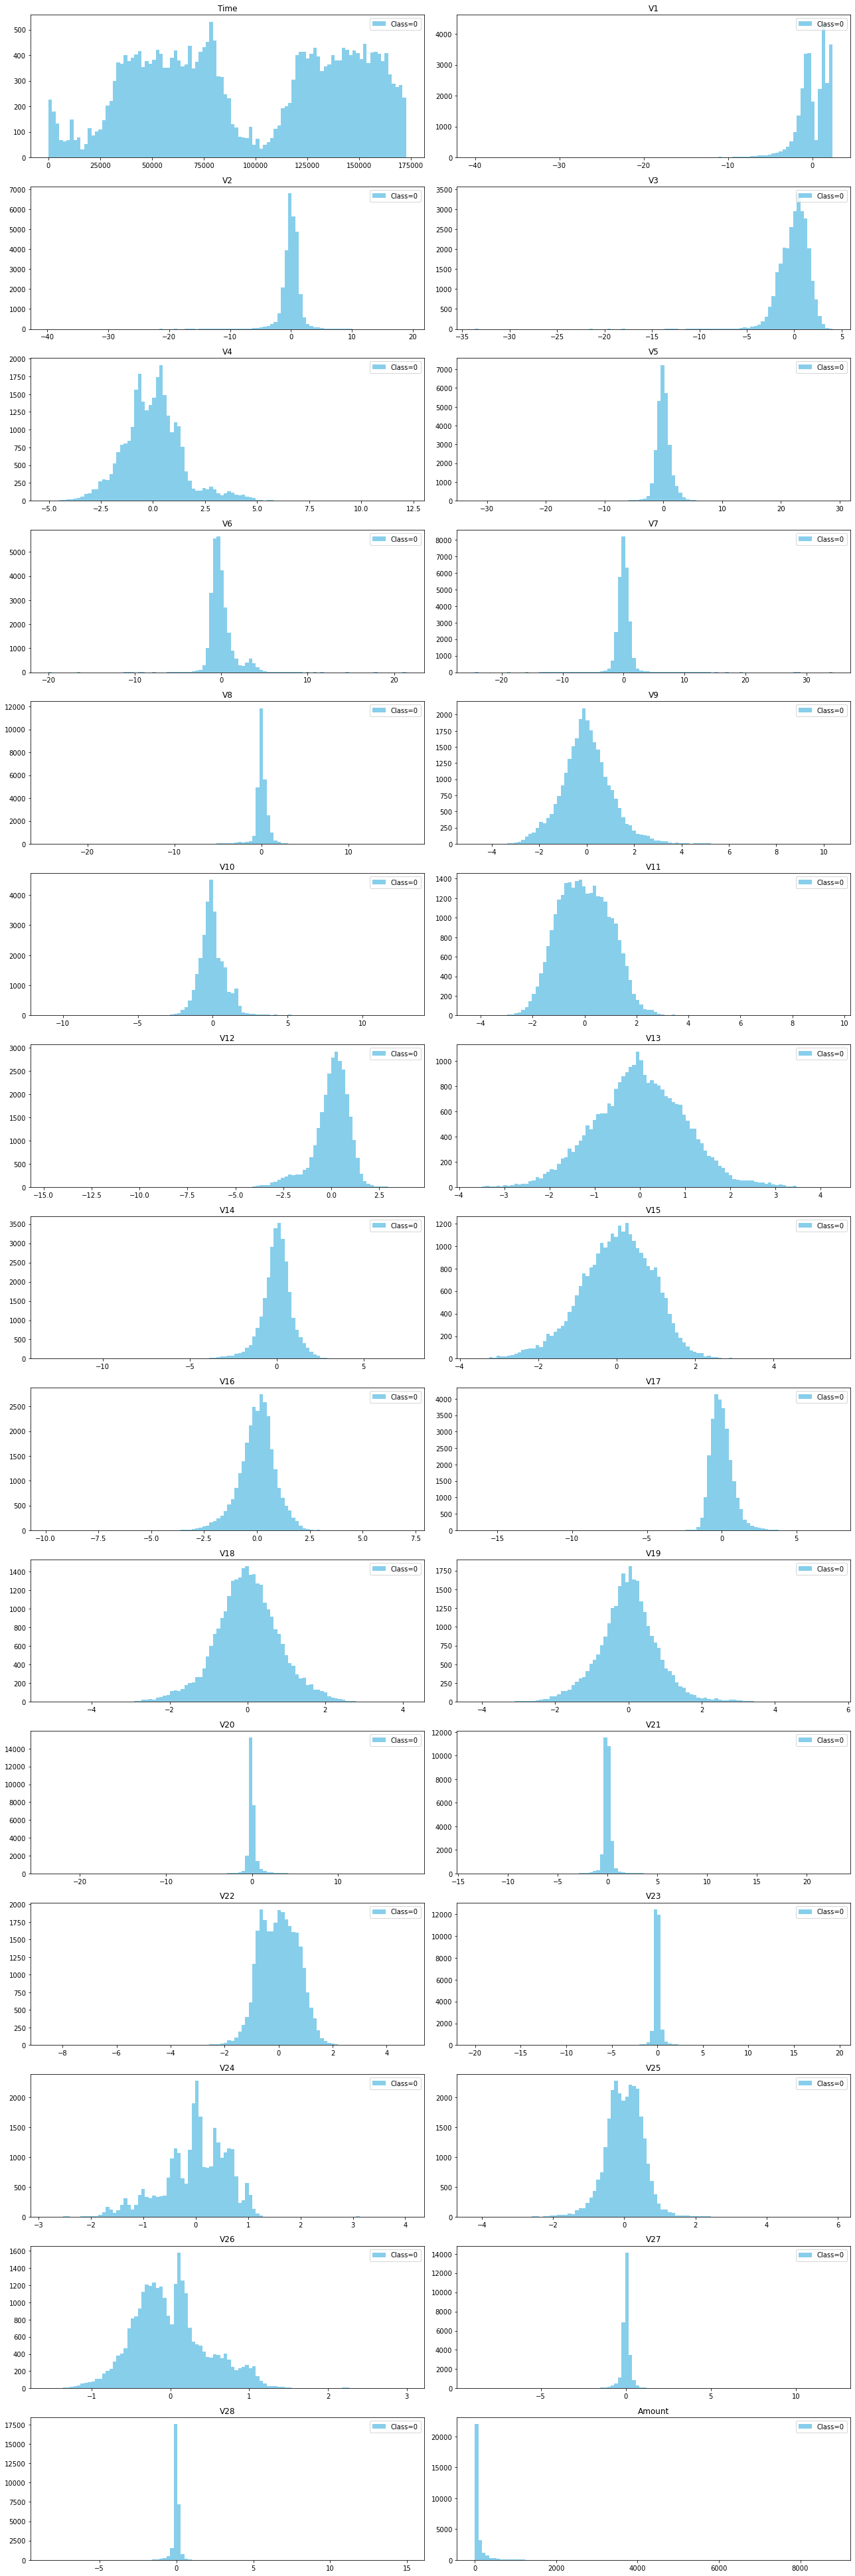

Диаграммы распределения для Class=1


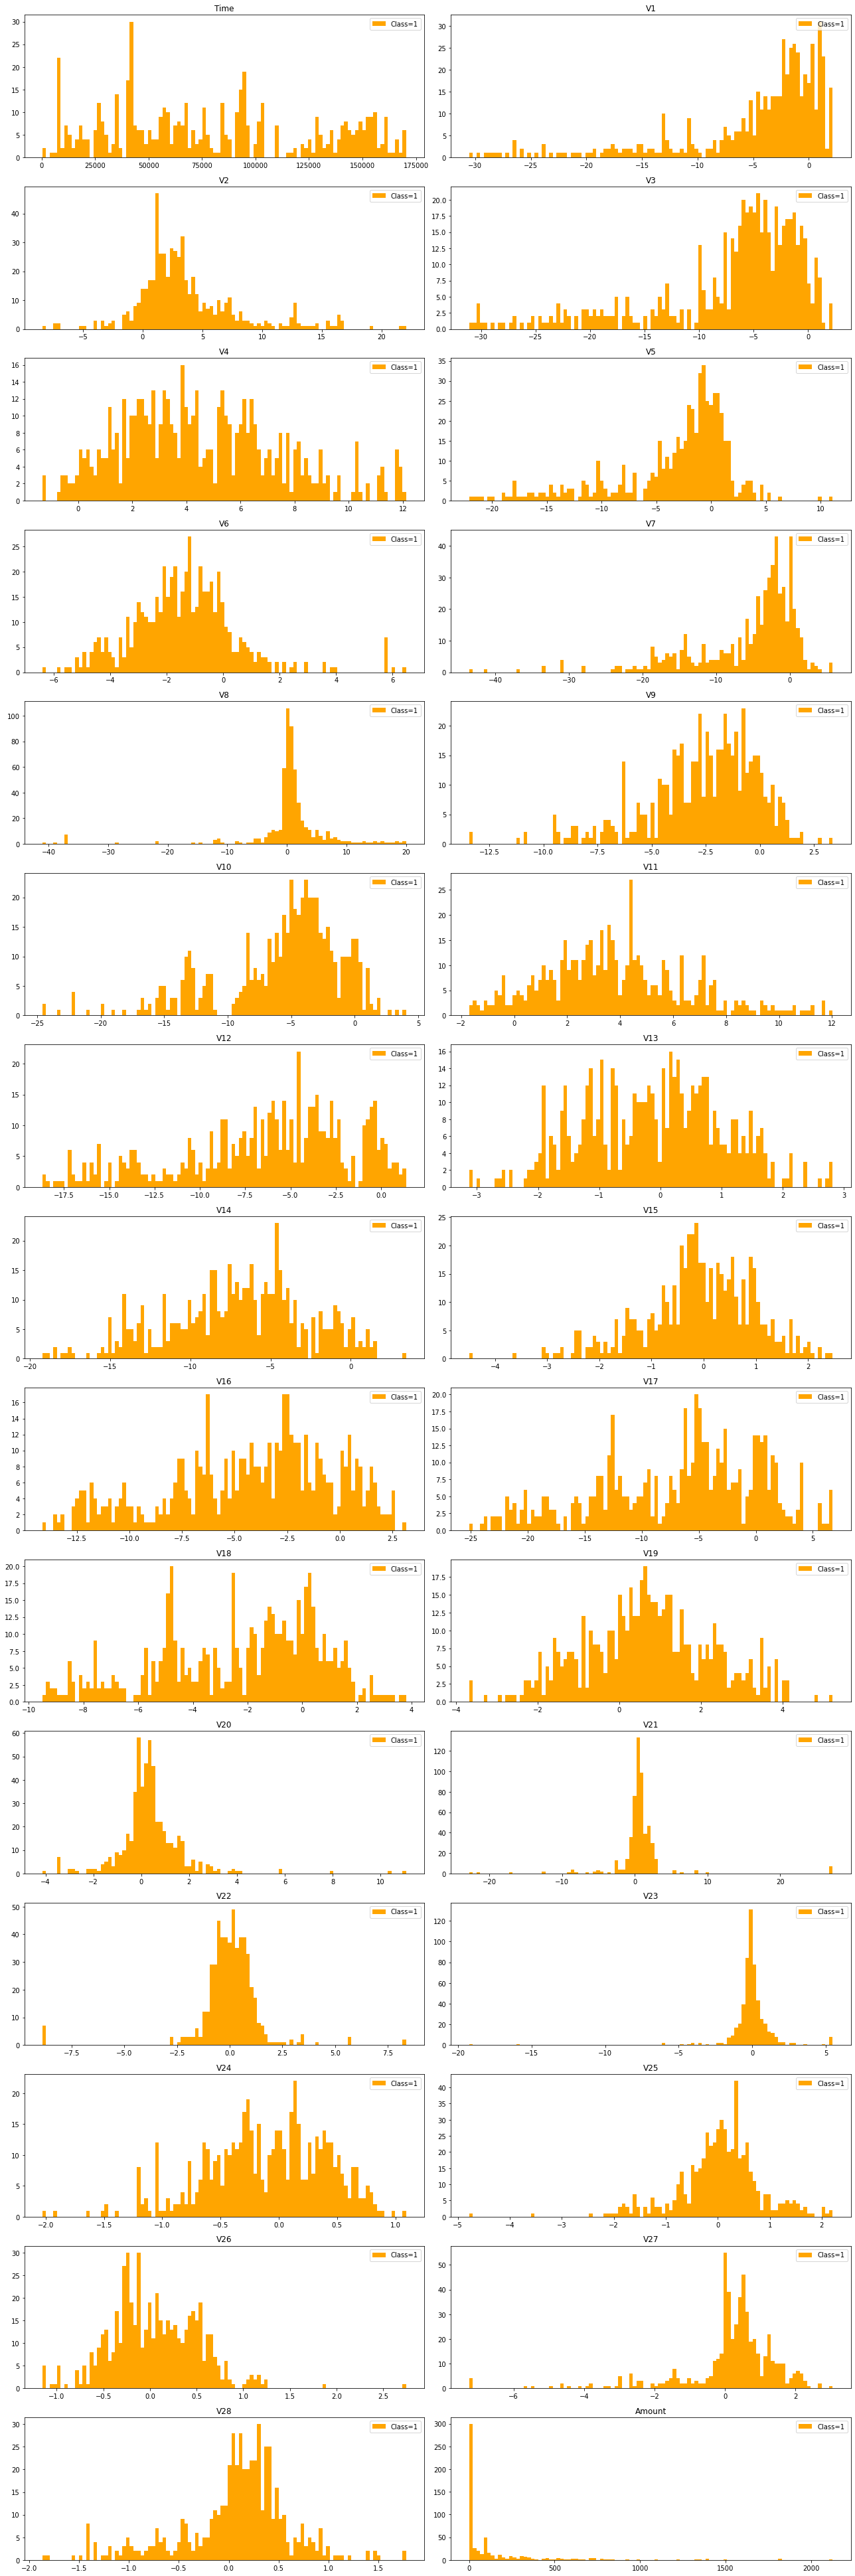

In [80]:
for feat_class in list(df['Class'].unique()):
    feature_plot_class(feat_class)

In [81]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,...,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000
mean,94780.482242,-0.088893,0.064193,-0.129998,0.092516,-0.054446,-0.020940,-0.096480,0.022606,-0.034562,...,0.019406,0.010739,0.005493,-0.002964,0.005486,0.004571,0.002195,-0.002089,88.779264,0.018776
std,47756.826415,2.237839,1.783290,1.986994,1.577318,1.596342,1.357134,1.711821,1.425280,1.184438,...,0.873182,0.740989,0.632005,0.609895,0.523975,0.482364,0.455869,0.320825,240.923000,0.135736
min,7.000000,-40.042537,-39.818310,-33.680984,-5.020488,-32.092129,-19.996349,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-20.034848,-2.807897,-4.781606,-1.547879,-8.878665,-8.307955,0.000000,0.000000
25%,53703.000000,-0.961236,-0.572706,-0.986115,-0.820976,-0.707304,-0.787313,-0.584358,-0.211957,-0.665316,...,-0.224463,-0.536090,-0.163257,-0.360685,-0.314523,-0.322747,-0.071259,-0.054781,5.350000,0.000000
50%,85073.000000,0.003193,0.078820,0.153436,0.020240,-0.060860,-0.289137,0.024322,0.027075,-0.052607,...,-0.022437,0.018658,-0.013186,0.039277,0.022700,-0.046966,0.001275,0.011267,22.000000,0.000000
75%,139659.000000,1.313985,0.831241,1.010647,0.805445,0.614762,0.405096,0.554112,0.343853,0.595564,...,0.197381,0.545797,0.150317,0.437570,0.357378,0.247256,0.095971,0.080257,78.000000,0.000000
max,172769.000000,2.396388,22.057729,4.029428,12.155016,28.762671,21.393069,34.303177,20.007208,10.370658,...,27.202839,8.361985,19.228169,4.016342,5.852484,2.991210,12.152401,14.929133,8790.260000,1.000000


In [82]:
print(f'Количество наблюдений с Class=1: {round(df["Class"].value_counts()[1] * 100.0 / df["Class"].value_counts()[0], 3)}%') 

Количество наблюдений с Class=1: 1.914%


3-сигмы:

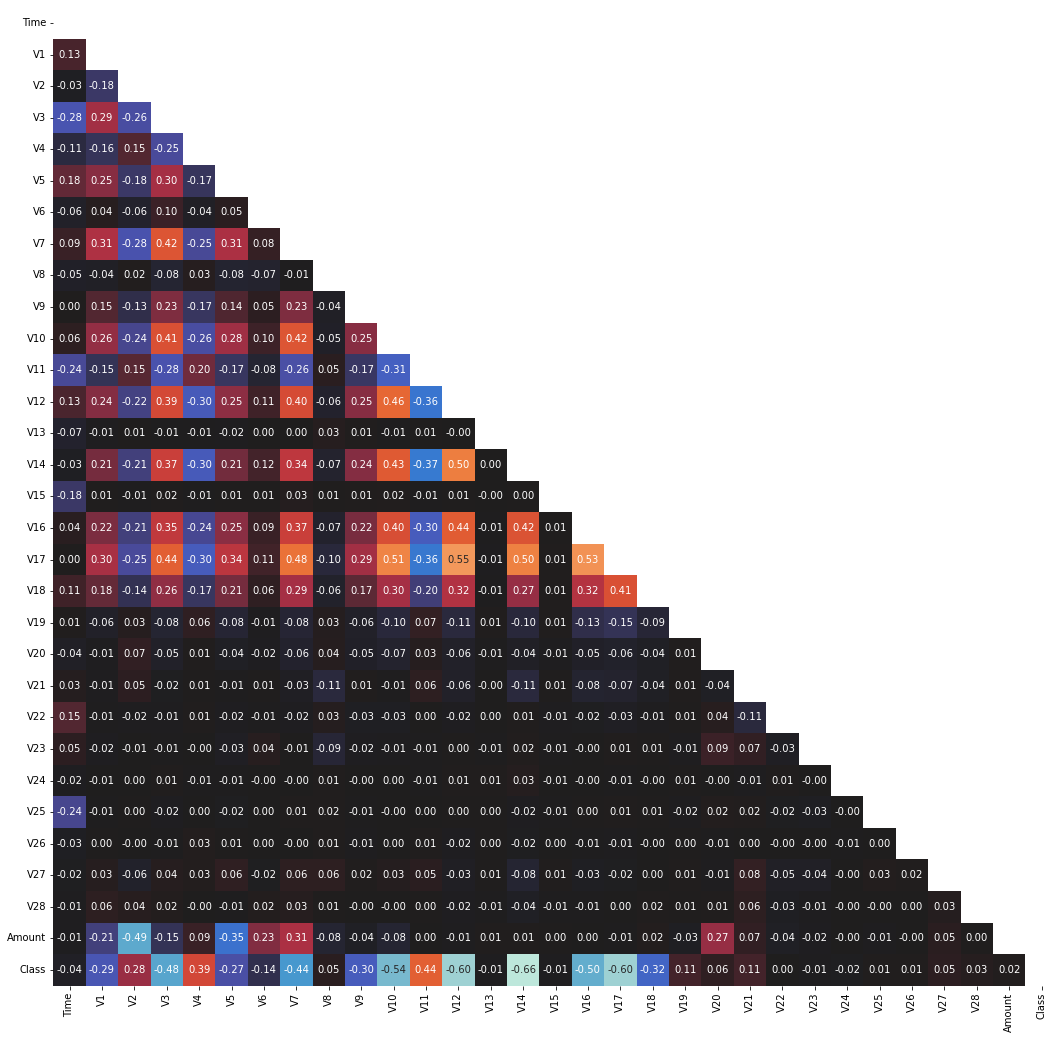

In [83]:
plt.figure(figsize=(18,18))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [98]:
high_corr = []
high_corr_matrix = corr_matrix[((corr_matrix >= 0.2) | (corr_matrix <= -0.2)) & (corr_matrix != 1.000)]
df_corr_matrix = pd.DataFrame(high_corr_matrix.unstack().sort_values(ascending=False).dropna())
for feature_pair in df_corr_matrix.index:
    if feature_pair[0] == 'Class':
        high_corr.append(feature_pair[1])
    if feature_pair[1] == 'Class':
        high_corr.append(feature_pair[0])
high_corr = list(set(high_corr))
print(f'Признаки, наиболее коррелированные с признаком "Class": {high_corr}')

Признаки, наиболее коррелированные с признаком "Class": ['V2', 'V7', 'V10', 'V18', 'V16', 'V9', 'V17', 'V14', 'V11', 'V3', 'V1', 'V5', 'V4', 'V12']


In [99]:
# print(f'Диаграммы распределения для наиболее коррелированных признаков')
# fig, axes = plt.subplots(nrows=int(len(high_corr)/2), ncols=2, figsize=(18, 54))
# axes = axes.ravel()
# for feature_index, ax in enumerate(axes):
#     ax.figure
#     sns.boxplot(x=high_corr[feature_index], y='Class', data=df, hue='Class', orient='h',width=0.2, saturation=0.9, ax=ax);
#     ax.legend(loc='upper right')
#     ax.set_title(high_corr[feature_index])
# plt.tight_layout()
# plt.show()

In [100]:
# high_corr.append('Class')
high_corr_list = high_corr.copy()
df_high_corr = df[high_corr_list]

In [101]:
df_high_corr

,V2,V7,V10,V18,V16,V9,V17,V14,V11,V3,V1,V5,V4,V12
0,0.531592,0.549159,-0.193184,0.382414,0.058414,-0.087695,-0.496620,0.524890,0.548093,0.457031,0.223985,0.112894,-0.157484,0.096317
1,-0.040790,-0.169860,-0.046587,-0.014815,0.218074,0.278586,-0.413924,0.344488,0.818752,0.349495,1.239825,-0.426162,0.246736,0.667889
2,-0.161610,0.994057,-0.441870,0.434512,0.089827,-0.062098,-0.334783,0.341536,-1.116051,1.192194,-0.718499,-0.598448,1.155871,-0.777821
3,-0.922872,-0.431017,0.322897,1.043029,0.752665,0.775204,-0.982103,0.453667,0.597031,-0.577359,1.522940,-0.605616,1.294990,0.323962
4,0.035295,0.404577,-0.553497,0.203362,-0.557669,-0.041276,0.831198,-0.707690,1.212286,-0.484328,-0.673556,2.515230,-0.461445,0.019449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,0.018544,0.166571,-0.296711,1.056825,0.408615,0.427608,0.220703,-0.380048,1.313651,-1.688944,1.948292,0.074849,0.473286,0.411669
28969,1.443027,0.851394,-1.223794,-0.024300,-0.166411,-0.061452,1.350154,-1.997596,-0.185809,0.089894,-0.593876,0.586863,-0.245529,0.585422
28970,0.830104,0.203018,0.385465,0.849701,-0.228564,-0.706854,-0.219693,0.579026,0.951270,1.259606,-0.200794,0.160884,1.338062,0.172137
28971,-0.554823,-0.807926,-0.344350,-0.456455,-0.393827,1.283739,0.252643,-0.679812,-0.905757,1.487659,0.888764,-1.137932,1.652179,0.652251


In [102]:
# plt.figure(figsize=(16, 16))
# sns.pairplot(data=df_high_corr, hue='Class', corner=True).fig.suptitle('Парные графики для признаков', fontsize = 14);
# plt.show();

In [103]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Число аномалий:\t\t{}\nПроцент аномалий:\t{:.2f}%".format(sum(outliers), 100*sum(outliers)/len(outliers)))    

In [105]:
data_features = df_high_corr #.drop(['Class'], axis=1)
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Число аномалий:		1306
Процент аномалий:	4.51%


In [106]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V2,5.414062,-5.285676,505.0,1.743002
V10,4.266823,-4.469544,485.0,1.673972
V14,4.169882,-4.413984,458.0,1.580782
V1,6.624625,-6.802410,392.0,1.352984
V7,5.038984,-5.231944,355.0,1.225279
V5,4.734581,-4.843473,351.0,1.211473
V17,4.473544,-4.702072,348.0,1.201118
V12,4.177402,-4.391694,347.0,1.197667
V9,3.518752,-3.587876,343.0,1.183861
V4,4.824469,-4.639437,332.0,1.145894


С помощью диаграмм размаха:

Диаграммы размаха признаков


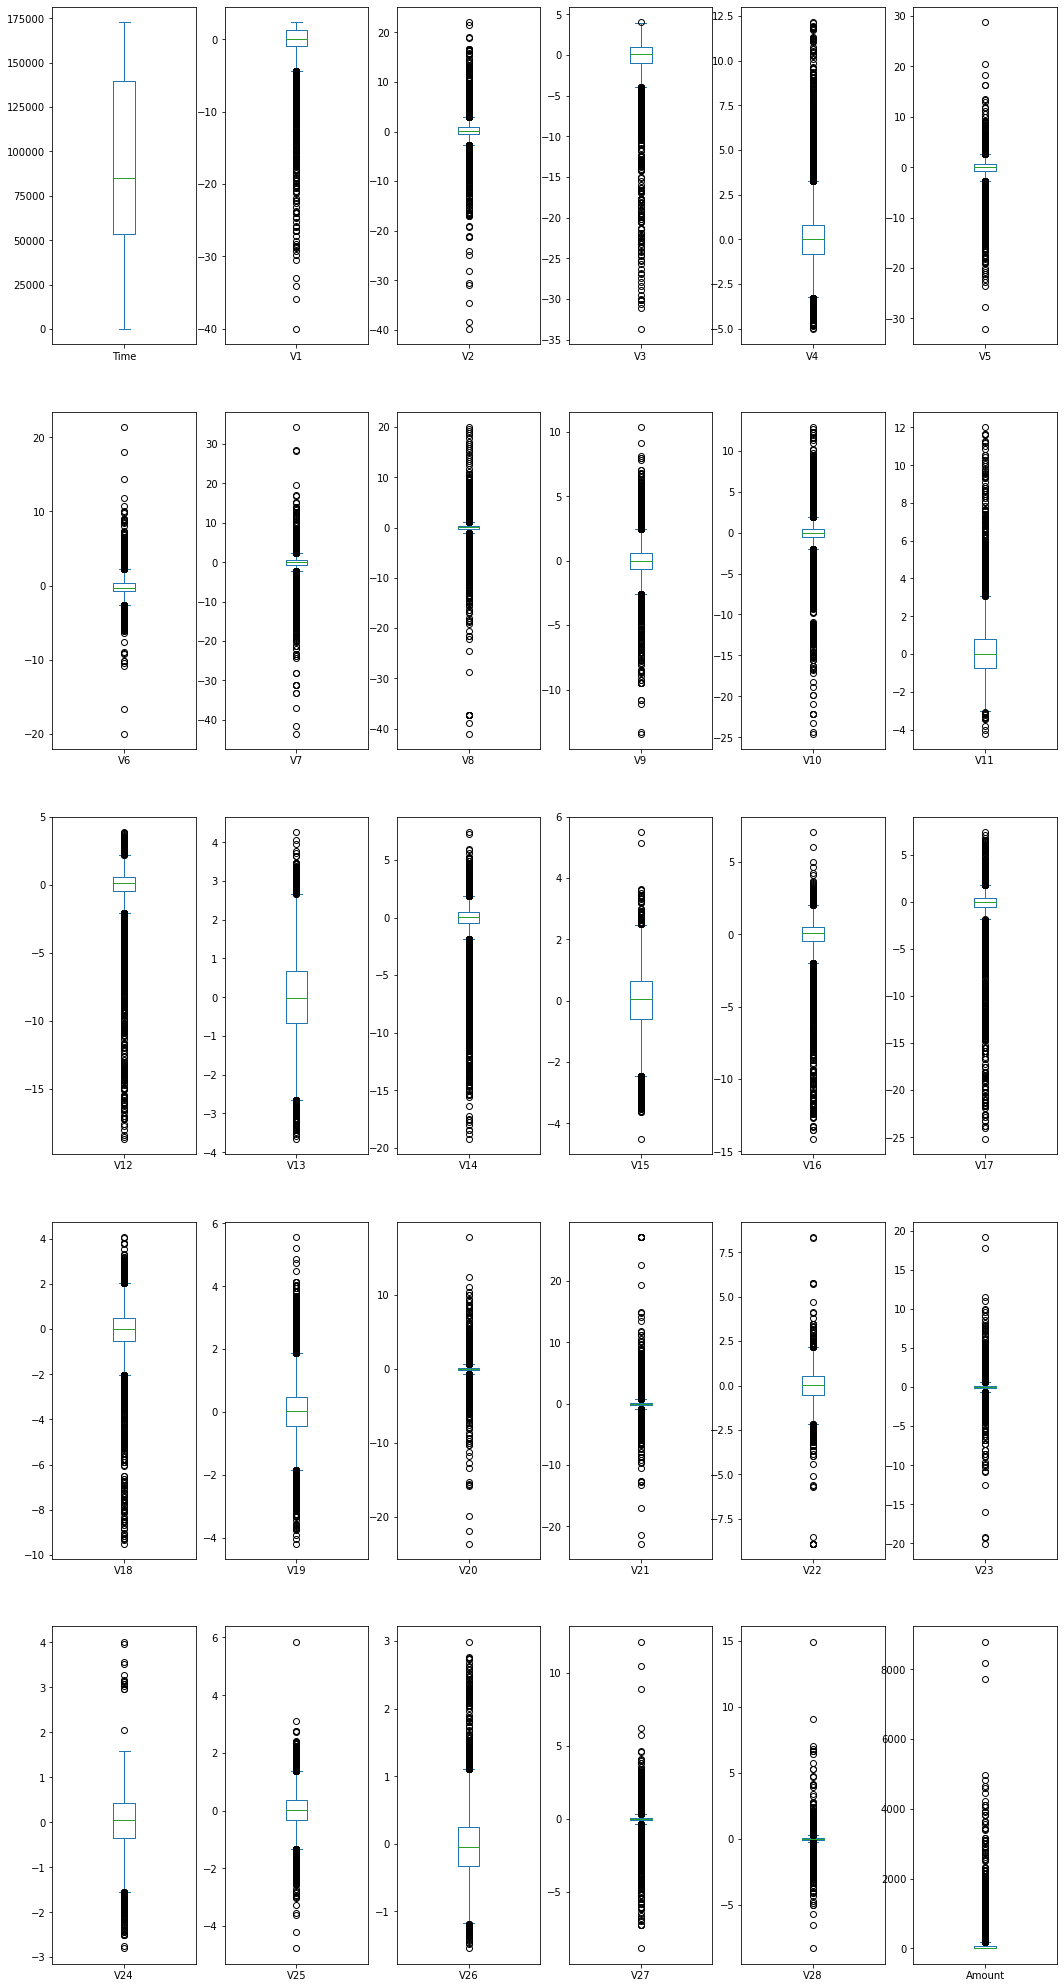

In [107]:
data_features = df.drop(['Class'], axis=1)
fig, axes = plt.subplots(5, 6, figsize=(18, 36))
print('Диаграммы размаха признаков')
row=0
col=0
for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col += 1
    if col > 5:
        row += 1
        col = 0

In [108]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [110]:
data_features = df_high_corr #.drop(['Class'], axis=1)
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Число аномалий:		1564
Процент аномалий:	5.40%


In [111]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V10,3.387687,-3.511980,647.0,2.233114
V14,3.314992,-3.284379,637.0,2.198599
V2,5.043085,-4.784550,605.0,2.088151
V7,3.969520,-3.999766,530.0,1.829289
V17,3.141096,-3.239950,483.0,1.667069
V12,3.804049,-3.630519,454.0,1.566976
V5,4.580961,-4.673503,386.0,1.332275
V16,3.551742,-3.505746,297.0,1.025092
V1,8.139645,-7.786896,297.0,1.025092
V3,7.000933,-6.976401,225.0,0.776585


С помощью кластеризации:

In [112]:
def elbow_checker(cluster_model, X):
    sns.reset_orig()
    k_max = 11
    inertia = []
    for k in range(1, k_max):
        kmeans = cluster_model(n_clusters=k).fit(X)
        inertia.append(np.sqrt(kmeans.inertia_))

    plt.figure(figsize=(16, 8))
    plt.plot(range(1, k_max), inertia, marker='x')

    plt.xlabel('Количество кластеров k')
    plt.ylabel('Инерция')
    plt.grid()
    plt.show()

In [113]:
def silhouette_checker(cluster_model, X):
    k_max = 6
    silhouette = []
    for k in tqdm(range(2, k_max)):
        agg = cluster_model(n_clusters=k).fit(X)
        labels = agg.labels_
        score = silhouette_score(X, labels)
        silhouette.append(score)
    plt.figure(figsize=(16, 8))
    plt.plot(range(2, k_max), silhouette, marker='x');
    plt.grid()

In [114]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_high_corr)
df_normalized = scaler.fit_transform(df_high_corr)
df_normalized = pd.DataFrame(df_normalized, columns=df_high_corr.columns)

In [115]:
df_normalized

,V2,V7,V10,V18,V16,V9,V17,V14,V11,V3,V1,V5,V4,V12
0,0.652109,0.566480,0.650711,0.727726,0.669606,0.560661,0.757180,0.740575,0.293830,0.905268,0.948811,0.529211,0.283136,0.831663
1,0.642858,0.557246,0.654621,0.698471,0.677141,0.576048,0.759718,0.733807,0.310492,0.902416,0.972748,0.520353,0.306671,0.856974
2,0.640906,0.572194,0.644077,0.731563,0.671088,0.561736,0.762147,0.733696,0.191381,0.924763,0.926603,0.517522,0.359603,0.792952
3,0.628603,0.553892,0.664477,0.776379,0.702371,0.596910,0.742277,0.737903,0.296842,0.877838,0.979419,0.517404,0.367703,0.841744
4,0.644088,0.564623,0.641100,0.714539,0.640530,0.562611,0.797940,0.694331,0.334719,0.880305,0.927662,0.568687,0.265439,0.828259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,0.643817,0.561567,0.647949,0.777395,0.686133,0.582308,0.779199,0.706624,0.340959,0.848361,0.989441,0.528586,0.319861,0.845628
28969,0.666839,0.570362,0.623221,0.697772,0.658995,0.561763,0.813870,0.645937,0.248649,0.895532,0.929540,0.536999,0.278010,0.853322
28970,0.656933,0.562035,0.666146,0.762141,0.656062,0.534651,0.765680,0.742606,0.318650,0.926550,0.938802,0.529999,0.370210,0.835020
28971,0.634551,0.549051,0.646679,0.665945,0.648263,0.618272,0.780180,0.695377,0.204327,0.932598,0.964475,0.508657,0.388499,0.856282


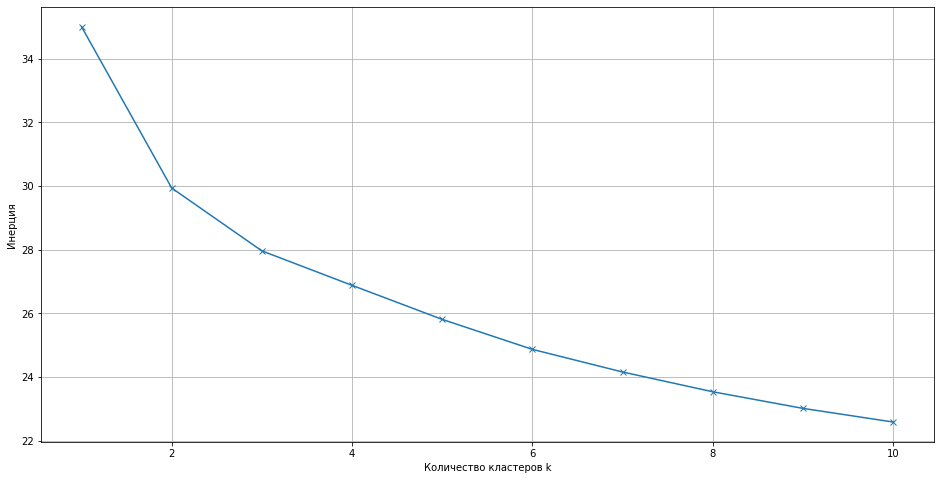

In [116]:
elbow_checker(KMeans, df_normalized)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:07<00:00, 16.96s/it]


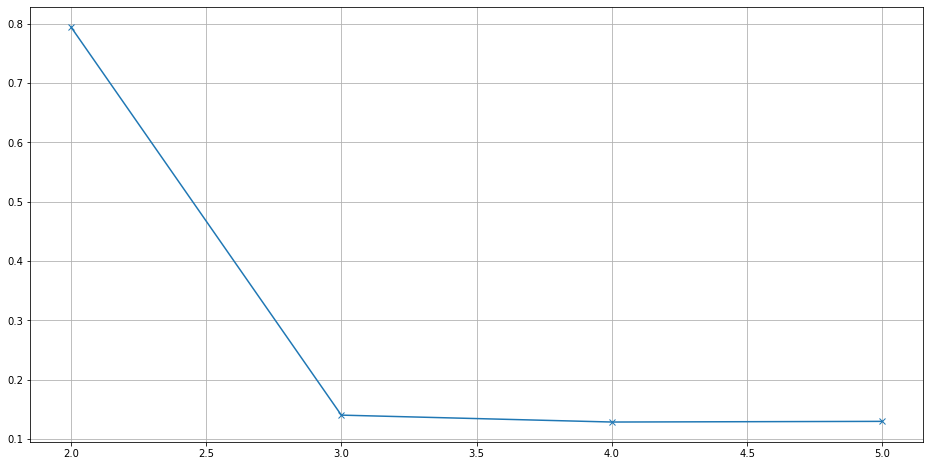

In [117]:
silhouette_checker(KMeans, df_normalized)

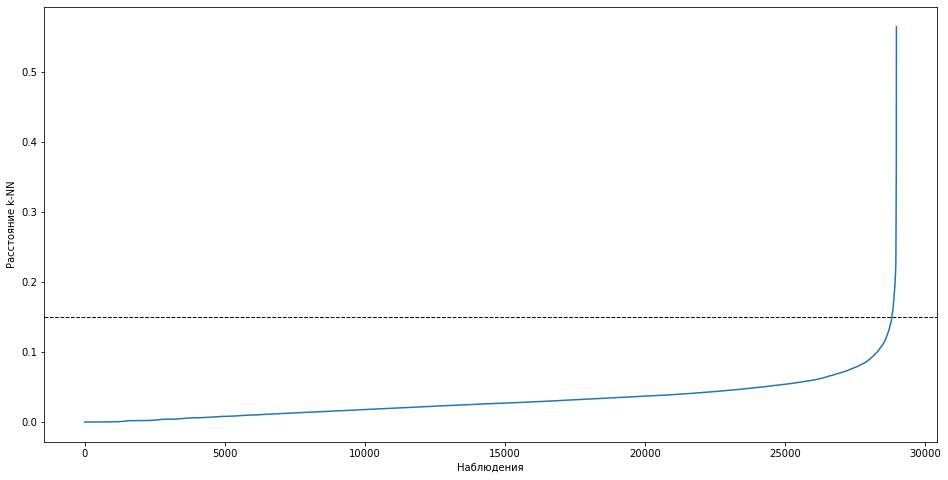

In [125]:
nbrs = NearestNeighbors(n_neighbors=df_normalized.shape[1] + 1).fit(df_normalized)  #.drop(columns=['Class'], axis=1)
neigh_dist, neigh_ind = nbrs.kneighbors(df_normalized)  #.drop(columns=['Class'], axis=1)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16, 8))
plt.plot(k_dist)
plt.axhline(y=0.15, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("Расстояние k-NN")
plt.xlabel("Наблюдения")
plt.show()

In [123]:
eps_list=np.arange(start=0.1, stop=0.2, step=0.01)
min_sample_list=np.arange(start=2, stop=df_normalized.shape[1], step=1)

silhouette_scores_data=pd.DataFrame()
silhouette = []
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        if(len(np.unique(db.fit_predict(df_normalized))) > 1):  #.drop(['Class'], axis=1)
            sil_score=silhouette_score(df_normalized, db.fit_predict(df_normalized)) #.drop(['Class'], axis=1)
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample:" + str(min_sample_trial)
        silhouette_scores_data = pd.concat([pd.DataFrame([[sil_score,trial_parameters]], columns=["score", "parameters"]), silhouette_scores_data], ignore_index=True)

KeyboardInterrupt: 

In [ ]:
score_parameters = silhouette_scores_data.sort_values(by='score', ascending=False).head(1)
best_eps = float(score_parameters['parameters'][0].split(' ')[0].split(':')[1])
best_pts = int(score_parameters['parameters'][0].split(' ')[1].split(':')[1])
print(f'Лучшие параметры:')
print(score_parameters)

In [131]:
dbscan = DBSCAN(eps=0.2, min_samples=15)
dbscan.fit_predict(df_normalized)  #.drop(columns=['Class'], axis=1)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(f'Количество записей каждого кластера: {dict(zip(unique, counts))}')

Количество записей каждого кластера: {-1: 624, 0: 28280, 1: 69}


In [32]:
kmeans = KMeans(n_clusters=4, random_state=97)
df['kmeans_cluster'] = kmeans.fit_predict(df_normalized)

In [33]:
df_normalized

,V17,V14,V10,V12,Class,kmeans_cluster
0,0.737173,0.635591,0.510600,0.680908,0.0,0
1,0.727794,0.641219,0.505267,0.744342,0.0,1
2,0.763381,0.640473,0.513018,0.706683,0.0,0
3,0.711253,0.636372,0.507585,0.710910,0.0,1
4,0.724243,0.608406,0.524303,0.724477,0.0,0
...,...,...,...,...,...,...
284802,0.789000,0.801627,0.598850,0.806406,0.0,1
284803,0.730383,0.623352,0.488530,0.738709,0.0,1
284804,0.740239,0.628885,0.498692,0.706572,0.0,0
284805,0.745946,0.661171,0.500464,0.667901,0.0,3


In [37]:
tsne = TSNE(n_components=2, random_state=10, init='random', learning_rate='auto')
df_tsne_class = tsne.fit_transform(df_normalized.drop(columns=['kmeans_cluster'], axis=1))
df_tsne_kmeans = tsne.fit_transform(df_normalized.drop(columns=['Class'], axis=1))

KeyboardInterrupt: 